In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset

city_df = city_data.drop_duplicates(subset=["city"], keep = 'first')
combined_pyber_data = city_df.merge(ride_data,on="city")
#combined_pyber_data = pd.merge(ride_data, city_data, on="city")
combined_pyber_data.head()
# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
city_grouped = combined_pyber_data.groupby("city")
city_grouped.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
28,Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
29,Williamsstad,59,Urban,2018-03-29 21:43:04,35.58,4747780858464
30,Williamsstad,59,Urban,2018-02-13 20:07:49,33.72,3796713212942
31,Williamsstad,59,Urban,2018-05-01 01:26:21,26.81,4542954169892
32,Williamsstad,59,Urban,2018-02-23 17:42:40,4.68,9109973457376


## Bubble Plot of Ride Sharing Data

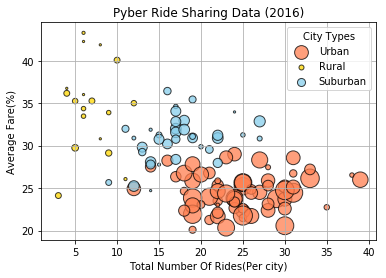

In [3]:


# Obtain the x and y coordinates for each of the three city types
urban_type = combined_pyber_data[combined_pyber_data["type"] == "Urban"].groupby([combined_pyber_data["city"]])
rural_type = combined_pyber_data[combined_pyber_data["type"] == "Rural"].groupby([combined_pyber_data["city"]])
suburban_type = combined_pyber_data[combined_pyber_data["type"] == "Suburban"].groupby([combined_pyber_data["city"]])

x_urban = urban_type["ride_id"].count()
y_urban = urban_type["fare"].mean()
z_urban = urban_type["driver_count"].mean()

x_rural = rural_type["ride_id"].count()
y_rural = rural_type["fare"].mean()
z_rural = rural_type["driver_count"].mean()

x_suburban = suburban_type["ride_id"].count()
y_suburban = suburban_type["fare"].mean()
z_suburban = suburban_type["driver_count"].mean()


# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s = z_urban*5, color=["coral"], edgecolor = "black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s = z_rural*5, color=["gold"], edgecolor = "black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s = z_suburban*5, color=["SkyBlue"], edgecolor = "black", alpha = 0.75, marker="o")
plt.grid()
# Incorporate the other graph properties

plt.xlabel("Total Number Of Rides(Per city)")
plt.ylabel("Average Fare(%)")
plt.title("Pyber Ride Sharing Data (2016)")
# Create a legend
legend = plt.legend(title = "City Types")
# Incorporate a text label regarding circle size

# Save Figure


plt.savefig("../Images/Pyberscatter.png")

# Show plot
plt.show()


## Total Fares by City Type

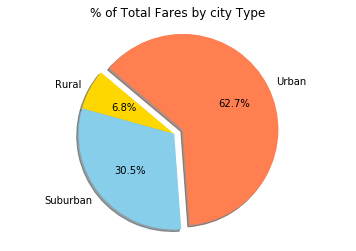

In [4]:
# Calculate Type Percents
city_grouped = combined_pyber_data.groupby("type")
#city_grouped.head()

total_fare = city_grouped["fare"].sum()
labels = total_fare.index

#total_fare.head()
#type_grouped.count().head()
# Build Pie Chart

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .1)

colors = ["gold", "skyblue", "coral"]

plt.pie(total_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by city Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Save Figure
plt.savefig("../Images/farepie.png")

## Total Rides by City Type

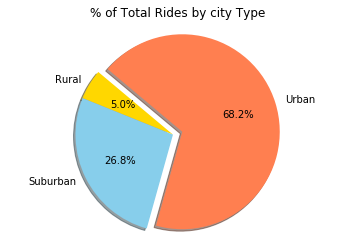

In [5]:
#city_grouped.head()
# Calculate Ride Percents
total_ride = city_grouped["ride_id"].sum()

total_ride.head()
labels = total_ride.index

explode = (0, 0, .1)

colors = ["gold", "skyblue", "coral"]

plt.pie(total_ride, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by city Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Save Figure
plt.savefig("../Images/ridepie.png")

In [6]:
# Show Figure
plt.show()

## Total Drivers by City Type

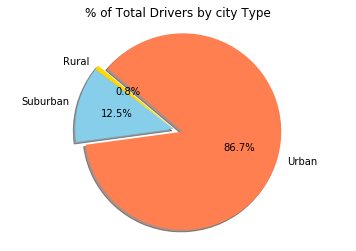

In [7]:
# Calculate Driver Percents
total_driver = city_grouped["driver_count"].sum()

total_driver.head()
labels = total_ride.index

explode = (0, 0, .1)

colors = ["gold", "skyblue", "coral"]

plt.pie(total_driver, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by city Type")
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Save Figure
plt.savefig("../Images/driverpie.png")


In [8]:
# Show Figure
plt.show()